In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
!pip install tensorflow


In [3]:
!pip install yfinance


In [8]:
import yfinance as yf
ticker = yf.Ticker('TSLA')
data = ticker.history(period='15y')
data.to_csv("TSLA_stock_data_15y.csv")

In [9]:
data = pd.read_csv("TSLA_stock_data_15y.csv")
data.tail(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3756,2025-06-04 00:00:00-04:00,345.100006,345.600006,327.329987,332.049988,98912100,0.0,0.0
3757,2025-06-05 00:00:00-04:00,322.489990,324.549988,273.209991,284.700012,287499800,0.0,0.0
3758,2025-06-06 00:00:00-04:00,298.829987,305.500000,291.140015,295.140015,164747700,0.0,0.0
3759,2025-06-09 00:00:00-04:00,285.959991,309.829987,281.850006,308.579987,138958000,0.0,0.0
3760,2025-06-10 00:00:00-04:00,315.070007,321.220001,310.666992,318.515015,73753604,0.0,0.0


In [10]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3761 non-null   object 
 1   Open          3761 non-null   float64
 2   High          3761 non-null   float64
 3   Low           3761 non-null   float64
 4   Close         3761 non-null   float64
 5   Volume        3761 non-null   int64  
 6   Dividends     3761 non-null   float64
 7   Stock Splits  3761 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 235.2+ KB


,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3761.000000,3761.000000,3761.000000,3761.000000,3.761000e+03,3761.0,3761.000000
mean,88.340946,90.321243,86.217250,88.314386,9.704025e+07,0.0,0.002127
std,113.646012,116.239138,110.785224,113.548778,7.693105e+07,0.0,0.095069
min,1.076000,1.108667,0.998667,1.053333,1.777500e+06,0.0,0.000000
25%,12.410000,12.756000,12.180000,12.495333,5.005350e+07,0.0,0.000000
50%,18.755333,19.100000,18.433332,18.746000,8.308710e+07,0.0,0.000000
75%,190.740005,196.250000,186.009995,190.946671,1.225158e+08,0.0,0.000000
max,475.899994,488.540009,457.510010,479.859985,9.140820e+08,0.0,5.000000


In [11]:
Sdata=data.drop(['Dividends','Stock Splits'], axis=1)
Sdata.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500


In [17]:
Sdata['Date']=pd.to_datetime(Sdata['Date'], utc=True)
Sdata.set_index('Date', inplace=True)

In [19]:
Sdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3761 entries, 2010-06-29 04:00:00+00:00 to 2025-06-10 04:00:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3761 non-null   float64
 1   High    3761 non-null   float64
 2   Low     3761 non-null   float64
 3   Close   3761 non-null   float64
 4   Volume  3761 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.3 KB


In [20]:
Sdata

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29 04:00:00+00:00,1.266667,1.666667,1.169333,1.592667,281494500
2010-06-30 04:00:00+00:00,1.719333,2.028000,1.553333,1.588667,257806500
2010-07-01 04:00:00+00:00,1.666667,1.728000,1.351333,1.464000,123282000
2010-07-02 04:00:00+00:00,1.533333,1.540000,1.247333,1.280000,77097000
2010-07-06 04:00:00+00:00,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...
2025-06-04 04:00:00+00:00,345.100006,345.600006,327.329987,332.049988,98912100
2025-06-05 04:00:00+00:00,322.489990,324.549988,273.209991,284.700012,287499800
2025-06-06 04:00:00+00:00,298.829987,305.500000,291.140015,295.140015,164747700


In [21]:
scaler = MinMaxScaler()
Scalerdata = scaler.fit_transform(Sdata)

In [22]:
Scalerdata

array([[4.01553072e-04, 1.14477655e-03, 3.73848278e-04, 1.12641280e-03,
        3.06604867e-01],
       [1.35488746e-03, 1.88607712e-03, 1.21501043e-03, 1.11805880e-03,
        2.80639852e-01],
       [1.24397043e-03, 1.27060568e-03, 7.72524114e-04, 8.57688465e-04,
        1.33184151e-01],
       ...,
       [6.27082857e-01, 6.24480428e-01, 6.35562188e-01, 6.14207593e-01,
        1.78635752e-01],
       [5.99978087e-01, 6.33363703e-01, 6.15212182e-01, 6.42277320e-01,
        1.50367010e-01],
       [6.61285047e-01, 6.56731127e-01, 6.78336541e-01, 6.63026882e-01,
        7.88948251e-02]])

In [23]:
sequence_days = 60  #using past 60 days to predict the new values
forecast_horizon = 7 #prediction for the next 7 days 

x=[]
y=[]

for i in range(sequence_days, len(Scalerdata)-forecast_horizon+1):
    x.append(Scalerdata[i-sequence_days:i])
    y.append(Scalerdata[i:i+forecast_horizon])

In [24]:
X = np.array(x)
Y = np.array(y)

In [25]:
X.shape

(3695, 60, 5)

In [26]:
Y.shape

(3695, 7, 5)

In [28]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
test_size = 7  
X_train, X_test = X[:-test_size], X[-test_size:]  # X_test = last 7 sequences
Y_train, Y_test = Y[:-test_size], Y[-test_size:]  # Y_test = actual values for those 7 sequences

In [30]:
# Reshape Y_train and Y_test from [samples, 7, 5] to [samples, 35]
Y_train_flat = Y_train.reshape(Y_train.shape[0], -1)  
Y_test_flat = Y_test.reshape(Y_test.shape[0], -1)

# Verify shapes
print("Y_train_flat shape:", Y_train_flat.shape)  # Should be (n_samples, 35)
print("Y_test_flat shape:", Y_test_flat.shape)    # Should be (n_test_samples, 35)

Y_train_flat shape: (3688, 35)
Y_test_flat shape: (7, 35)


In [31]:
model = Sequential()
model.add(LSTM(units=128, return_sequences=False, input_shape=(60, 5)))
model.add(Dropout(0.2))
model.add(Dense(35))  # Output 35 units (flattened 7x5)
model.compile(optimizer='adam', loss='mse')

In [32]:
history = model.fit(
    X_train, 
    Y_train_flat,  # Use flattened Y if keeping Dense(35)
    epochs=50,
    batch_size=32,
    validation_data=(X_test, Y_test_flat),
    verbose=1
)

Epoch 1/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - loss: 0.0159 - val_loss: 0.0041
Epoch 2/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.0029 - val_loss: 0.0033
Epoch 3/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 0.0023 - val_loss: 0.0029
Epoch 4/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 5/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 0.0019 - val_loss: 0.0037
Epoch 6/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.0018 - val_loss: 0.0034
Epoch 7/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.0017 - val_loss: 0.0035
Epoch 8/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 0.0016 - val_loss: 0.0039
Epoch 9/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.0016 - val_loss: 0.0038
Epoch 10/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - loss: 0.0016 - val_loss: 0.0038
Epoch 11/50
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 0.0015 - val_loss: 0.0033
Epoch 12/50
116/116 ━━━━━━━━━━━━━━━━━━━━

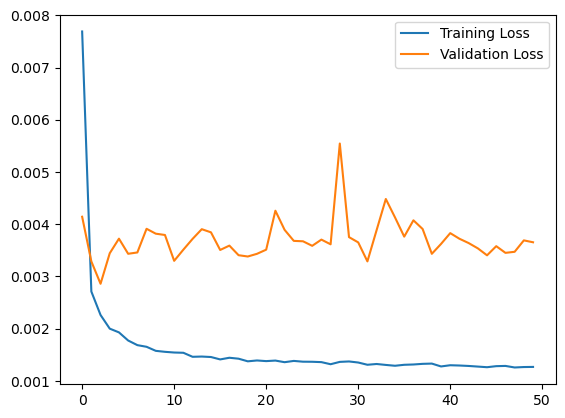

In [33]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [34]:
Y_pred_scaled = model.predict(X_test)
Y_pred = scaler.inverse_transform(Y_pred_scaled.reshape(-1, 5))  # Reshape and inverse transform
Y_true = scaler.inverse_transform(Y_test.reshape(-1, 5))

Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step


array([[3.3950168e+02, 3.4472784e+02, 3.2954297e+02, 3.3779196e+02,
        9.5320664e+07],
       [3.3711063e+02, 3.4489444e+02, 3.2919260e+02, 3.3611844e+02,
        9.8291392e+07],
       [3.3760175e+02, 3.4541806e+02, 3.2897687e+02, 3.3643994e+02,
        9.7204232e+07],
       [3.3656046e+02, 3.4429813e+02, 3.2695898e+02, 3.3496133e+02,
        9.4729648e+07],
       [3.3593506e+02, 3.4261459e+02, 3.2830045e+02, 3.3508368e+02,
        9.6797552e+07],
       [3.3710843e+02, 3.4219299e+02, 3.2808435e+02, 3.3253012e+02,
        9.3108528e+07],
       [3.3472321e+02, 3.4371286e+02, 3.2598816e+02, 3.3449985e+02,
        9.4446296e+07],
       [3.4068433e+02, 3.4594339e+02, 3.3070209e+02, 3.3893478e+02,
        9.2245304e+07],
       [3.3822882e+02, 3.4610977e+02, 3.3038571e+02, 3.3721368e+02,
        9.5745768e+07],
       [3.3867023e+02, 3.4665100e+02, 3.2999890e+02, 3.3752914e+02,
        9.5049760e+07],
       [3.3762222e+02, 3.4523389e+02, 3.2799313e+02, 3.3607175e+02,
        9.30

In [36]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_true[:, 3], Y_pred[:, 3])
print(f"MAE for Close Price: ${mae:.2f}")

MAE for Close Price: $21.60


In [41]:
last_60_days = Scalerdata[-60:]  # Last 60 days of scaled data
last_60_days = last_60_days.reshape(1, 60, 5)  # Reshape for LSTM (batch, timesteps, features)

# Predict next 7 days
predicted_scaled = model.predict(last_60_days)

# Inverse transform to get actual stock prices (USE SQUARE BRACKETS for reshape)
predicted_prices = scaler.inverse_transform(predicted_scaled.reshape(-1, 5)) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


In [42]:
import datetime

last_date = Sdata.index[-1]  # Last date in your dataset (June 9, 2025)
next_dates = [last_date + datetime.timedelta(days=i) for i in range(1, 8)]  # June 10–17, 2025

prediction_df = pd.DataFrame(predicted_prices, columns=Sdata.columns, index=next_dates)
print(prediction_df[['Open', 'High', 'Low', 'Close']])  # Show key columns

                                 Open        High         Low       Close
2025-06-11 04:00:00+00:00  316.429901  322.004822  307.402130  315.294495
2025-06-12 04:00:00+00:00  314.326630  321.997925  307.151306  313.702942
2025-06-13 04:00:00+00:00  314.597473  322.300079  306.905396  313.316711
2025-06-14 04:00:00+00:00  313.521393  320.691010  304.736816  312.940582
2025-06-15 04:00:00+00:00  312.756073  319.371307  305.422028  312.447388
2025-06-16 04:00:00+00:00  314.423157  319.592163  305.583466  311.043854
2025-06-17 04:00:00+00:00  312.716858  320.755798  304.363220  312.612671


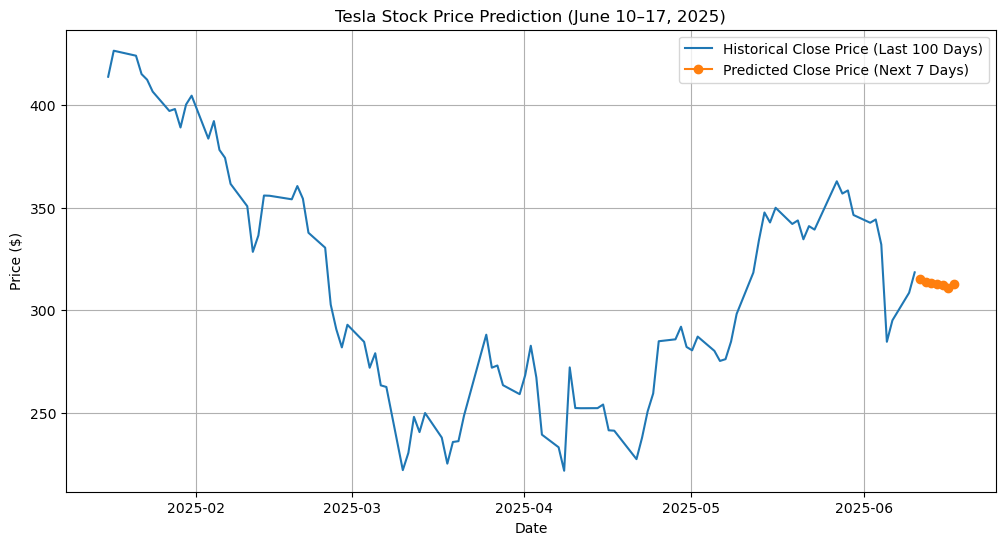

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(Sdata['Close'].tail(100), label='Historical Close Price (Last 100 Days)')
plt.plot(prediction_df['Close'], marker='o', label='Predicted Close Price (Next 7 Days)')
plt.title('Tesla Stock Price Prediction (June 10–17, 2025)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()